In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import libraries
import numpy as np
import pandas as pd 
import tensorflow as tf
import nltk
import seaborn as sns
import re
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Language_Detection.csv')
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [ ]:
df=df.dropna()
X=df.drop('Language',axis=1) #Input
y=df['Language'] #Output

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Possible nested set at position 1
  import sys


In [ ]:
import tensorflow_hub as hub
bert = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/2")
embeddings = bert(X)
print(embeddings)
print("shape=",embeddings[1].shape)
print("The sentence in the paragraph:\n",X[1],"\nis converted into vector as :\n", embeddings[1])

tf.Tensor(
[[ 0.12778848  0.02403603 -0.09339465 ... -0.0418597  -0.09198532
   0.09026735]
 [ 0.484048   -0.06725463 -0.10020828 ...  0.09389069 -0.0851873
   0.06392989]
 [ 0.3990358  -0.08613508 -0.06939027 ... -0.01618767 -0.13552088
   0.07235973]
 ...
 [-0.5095879  -0.14700373 -0.12929739 ...  0.37298828 -0.22492926
  -0.02492031]
 [-0.52644193 -0.20362891 -0.26262432 ...  0.31079188 -0.01352573
   0.01991738]
 [-0.7028307  -0.03590294 -0.12302309 ...  0.47081593 -0.27076986
  -0.05819067]], shape=(10337, 128), dtype=float32)
shape= (128,)
The sentence in the paragraph:
 "Nature" can refer to the phenomena of the physical world, and also to life in general. 
is converted into vector as :
 tf.Tensor(
[ 0.484048   -0.06725463 -0.10020828  0.06612628 -0.11392404 -0.04121799
 -0.19390997 -0.05654576 -0.08223679  0.08746222  0.01603101  0.11656304
 -0.12331242 -0.05298017 -0.07296603 -0.12864597 -0.27189773  0.03569224
 -0.0308062   0.38380077 -0.04825338  0.0459637   0.04912325  0.02

In [ ]:
import tensorflow_hub as hub
bert = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/2")
embeddings = bert(X)
print(embeddings)
print("shape=",embeddings[2000].shape)
print("The sentence in the paragraph:\n",X[2000],"\nis converted into vector as :\n", embeddings[2000])

tf.Tensor(
[[ 0.12778848  0.02403603 -0.09339465 ... -0.0418597  -0.09198532
   0.09026735]
 [ 0.484048   -0.06725463 -0.10020828 ...  0.09389069 -0.0851873
   0.06392989]
 [ 0.3990358  -0.08613508 -0.06939027 ... -0.01618767 -0.13552088
   0.07235973]
 ...
 [-0.5095879  -0.14700373 -0.12929739 ...  0.37298828 -0.22492926
  -0.02492031]
 [-0.52644193 -0.20362891 -0.26262432 ...  0.31079188 -0.01352573
   0.01991738]
 [-0.7028307  -0.03590294 -0.12302309 ...  0.47081593 -0.27076986
  -0.05819067]], shape=(10337, 128), dtype=float32)
shape= (128,)
The sentence in the paragraph:
 वाक्यांश संख्या दो, जब आपने किसी को कुछ समय के लिए नहीं देखा है, तो आप उसे बताएंगे कि कोई समय नहीं है, तो इसका मतलब है कि आपने इस व्यक्ति को शायद हफ्तों या महीनों में नहीं देखा है जब तक कि वाक्यांश संख्या नहीं देखी जाती है। तीन अगर आप पूछना चाहते हैं कि आप क्या कर रहे हैं। आप पूछते हैं कि आपके जीवन में क्या चल रहा था? 
is converted into vector as :
 tf.Tensor(
[-1.06079257e+00 -2.68237889e-01 -1.69575125e-01 -3.2

In [ ]:
import tensorflow_hub as hub
bert = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/2")
embeddings = bert(X)
print(embeddings)
print("shape=",embeddings[2500].shape)
print("The sentence in the paragraph:\n",X[2500],"\nis converted into vector as :\n", embeddings[2500])

tf.Tensor(
[[ 0.12778848  0.02403603 -0.09339465 ... -0.0418597  -0.09198532
   0.09026735]
 [ 0.484048   -0.06725463 -0.10020828 ...  0.09389069 -0.0851873
   0.06392989]
 [ 0.3990358  -0.08613508 -0.06939027 ... -0.01618767 -0.13552088
   0.07235973]
 ...
 [-0.5095879  -0.14700373 -0.12929739 ...  0.37298828 -0.22492926
  -0.02492031]
 [-0.52644193 -0.20362891 -0.26262432 ...  0.31079188 -0.01352573
   0.01991738]
 [-0.7028307  -0.03590294 -0.12302309 ...  0.47081593 -0.27076986
  -0.05819067]], shape=(10337, 128), dtype=float32)
shape= (128,)
The sentence in the paragraph:
 என் அம்மாவிடம் என்னை வீட்டிற்கு செல்ல விடுங்கள் மெலிசா மற்றும் டெரன்ஸ் ஒருவருக்கொருவர் பார்த்து நன்றாக கண் சிமிட்டினர். 
is converted into vector as :
 tf.Tensor(
[-0.6095066  -0.06881779 -0.24264042  0.07796168  0.13601384 -0.22306603
 -0.32625318  0.04569533 -0.14271961  0.00981649 -0.13399799  0.1600044
  0.16596377 -0.12154382  0.13472319 -0.16911528  0.14720492 -0.06585824
  0.07254849 -0.3636522  -0.0903273

In [ ]:
messages=X.copy()
messages.reset_index(inplace=True) 

In [ ]:
nltk.download('stopwords')
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Text'][i]) #Remove Special Characters and digits
    review = review.lower() #Lower case 
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #Remove stopwords
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# code for Glove word embedding  
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
  
# number of unique words in dict.
print("Number of unique words in dictionary=", len(tokenizer.word_index))

def embedding_for_vocab(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1
    # Adding again 1 because of reserved 0 index
    embedding_matrix_vocab = np.zeros((vocab_size, embedding_dim))
    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix_vocab[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix_vocab
    
# matrix for vocab: word_index
embedding_dim = 100
embedding_matrix_vocab = embedding_for_vocab('/content/drive/MyDrive/glove.6B.300d.txt', tokenizer.word_index, embedding_dim)
print("Dense vector for first word is => ", embedding_matrix_vocab[1])

Number of unique words in dictionary= 21858
Dense vector for first word is =>  [ 0.41448     0.37182999 -0.54288    -0.27135     0.15284     0.36021999
 -1.07640004 -0.024004   -0.18445    -1.65310001  0.57112002 -0.18643001
 -0.058574   -0.72650999 -0.0086029  -0.63115001 -0.21867     0.45084
  0.60867     0.39752999 -0.87519997  0.69128001  0.44080001 -0.19983
  0.10087    -0.17122     0.53097999  0.66426998  0.35005999 -0.29385999
  0.64579999  0.37171    -0.16801     0.42021999 -0.026076   -0.53626001
  1.03199995 -0.017245   -0.42954999 -0.53426999 -0.4332      0.016421
  0.56849998  0.40968001  0.10313     0.034887    0.25668001  1.07710004
  0.26875001  0.32427999  0.30946001  1.00230002  0.55751997  0.59030002
  0.12926     0.57999003 -1.03789997 -0.45901     0.26747999 -0.79707003
  0.0017965  -0.58337998  0.46263999  0.49495    -0.22877    -0.74364001
  0.56700999 -0.56405997  0.10903    -0.71495003 -0.26471001  0.29521999
 -0.058993   -0.88959002 -0.60917002  0.038756    1.2

In [ ]:
#Contains the pretrained GloVe weights for the words
voc_size=len(embedding_matrix_vocab)
print(voc_size)

21859


In [ ]:
#One hot representation for input
onehot_repr=[one_hot(words, voc_size)for words in corpus]

#Finding max words
l = 0
for x in corpus:
    l = max(l,len(x.split(' ')))

#Padding the sequences for input
sent_length= l
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[    0     0     0 ...  8266  5616 18238]
 [    0     0     0 ... 19244   938  4880]
 [    0     0     0 ...  1644  5214 19080]
 ...
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0 13831]
 [    0     0     0 ...     0     0     0]]


In [ ]:
#Encoding the target outputs to integers
label_encoder = preprocessing.LabelEncoder()

X_final=np.array(embedded_docs) #input to array
y = label_encoder.fit_transform(y)
y_final=np.array(y)
print(y_final)

[3 3 3 ... 9 9 9]


In [ ]:
X_final.shape,y_final.shape

((10337, 229), (10337,))

In [ ]:
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42) 
#Train-Validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=21)

In [ ]:
# LSTM for sequence classification
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 3000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# truncate and pad input sequences
max_review_length = 300
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train, y_train, validation_split=0.33, epochs=29, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Validation Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 32)           96000     
                                                                 
 lstm_3 (LSTM)               (None, 100)               53200     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 149,301
Trainable params: 149,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/29
262/262 [==============================] - 120s 450ms/step - loss: 0.4902 - accuracy: 0.7586 - val_loss: 0.3730 - val_accuracy: 0.8442
Epoch 2/29
262/262 [==============================] - 150s 572ms/step - loss: 0.3166 - accuracy: 0.8707 - val_loss: 0.3566 - val_accuracy: 0.8439
Epoch 3/29
262/

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test','validation'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test','validation'],loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(x_train)
y_pred1 = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
train_acc = accuracy_score(y_train, y_pred)
test_acc = accuracy_score(y_test, y_pred1)
cm = confusion_matrix(y_test, y_pred1)
print("Training Accuracy is :",train_acc)
print("Testing Accuracy is :",test_acc)

Training Accuracy is : 0.9880275728624985
Testing Accuracy is : 0.9792069632495164


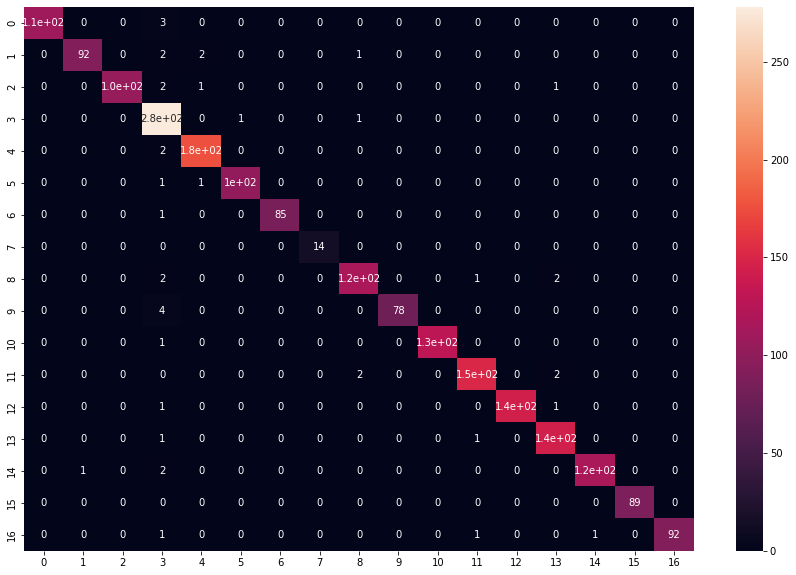

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The sentence is in",lang[0], "language")

In [ ]:
predict("HELLO ALL WELCOME")

The sentence is in English language


In [ ]:
predict("सभी के लिए शुभकामनाएं")

The sentence is in Hindi language


In [ ]:
predict("எல்லோருக்கும் வாழ்த்துக்கள்")

The sentence is in Tamil language
